# Ask

Defining the problem and the objectives of the study and the desired outcome.

A CEO of a smart device company (Bellabeat) asks you to analyze competitor smart device usage data in order to gain insight into how customers use these products. They then want you to use these insights and apply them to Bellabeats own product and marketing strategy.

Business questions.
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

Deliverables.
1. A clear summary of the business task
2. A description of all data sources used
3. Documentation of any cleaning or manipulation of data 
4. A summary of your analysis
5. Supporting visualizations and key findings
6. Your top high-level content recommendations based on your analysis

Key stakeholders.
1. Bellabeat CEO
2. Bellabeat marketing team

# Prepare

Information about data.
1. Data is publicly available on Kaggle
2. Generated by respondents from a survey
3. Personal tracker data of 30 FitBit users
4. Data collected includes physical activity, key biometrics, sleep and steps

Data limitations.
1. Data is outdated
2. Small sample size

Data selection.
1. dailyActivity_merged.csv
2. sleepDay_merged.csv

# Process phase

Explore, clean and transform data.

In [94]:
# import necessary packages
import pandas as pd
import matplotlib.pyplot as plt

In [95]:
# read data
original_data = pd.read_csv('data/dailyActivity_merged.csv')
original_sleep_data = pd.read_csv('data/SleepDay_merged.csv')

In [96]:
# make a copy of the original data
df = original_data.copy()
sleepdf = original_sleep_data.copy()

In [97]:
# show 5 rows of the data
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [98]:
# show the shape of the dataframe (rows, columns)
df.shape

(940, 15)

In [99]:
# drop all full 0 rows
df = df.loc[(df!=0).any(axis=1)] 

In [100]:
# drop rows where TotalSteps is 0
df = df.drop(df[df.TotalSteps == 0].index)

In [101]:
# show information about the data and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 863 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        863 non-null    int64  
 1   ActivityDate              863 non-null    object 
 2   TotalSteps                863 non-null    int64  
 3   TotalDistance             863 non-null    float64
 4   TrackerDistance           863 non-null    float64
 5   LoggedActivitiesDistance  863 non-null    float64
 6   VeryActiveDistance        863 non-null    float64
 7   ModeratelyActiveDistance  863 non-null    float64
 8   LightActiveDistance       863 non-null    float64
 9   SedentaryActiveDistance   863 non-null    float64
 10  VeryActiveMinutes         863 non-null    int64  
 11  FairlyActiveMinutes       863 non-null    int64  
 12  LightlyActiveMinutes      863 non-null    int64  
 13  SedentaryMinutes          863 non-null    int64  
 14  Calories       

In [102]:
# count of unique Ids. Should be 30 but someone might have created multiple accounts
unique_Ids = df.Id.unique()
len(unique_Ids)

33

In [103]:
# converting the ActivityDate column to datetime
df.ActivityDate = pd.to_datetime(df.ActivityDate)

In [104]:
# renaming column in the sleep data for easier merge
# converting the ActivityDate column to datetime
sleepdf = sleepdf.rename(columns={'SleepDay':'ActivityDate'})
sleepdf.ActivityDate = pd.to_datetime(sleepdf.ActivityDate)

/var/folders/xc/jz02jnyn40g7ycbnzmxkf04m0000gn/T/ipykernel_47467/3169407301.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sleepdf.ActivityDate = pd.to_datetime(sleepdf.ActivityDate)


In [105]:
# merging activity data and sleep data
df = df.merge(sleepdf, how='left', left_on=['Id','ActivityDate'], right_on=['Id','ActivityDate'])

In [106]:
# dropping duplicates based on Id and ActivityDate
df = df.drop_duplicates(subset=['Id','ActivityDate'])

In [107]:
# show information about the data and datatypes after the merge
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 863 entries, 0 to 865
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        863 non-null    int64         
 1   ActivityDate              863 non-null    datetime64[ns]
 2   TotalSteps                863 non-null    int64         
 3   TotalDistance             863 non-null    float64       
 4   TrackerDistance           863 non-null    float64       
 5   LoggedActivitiesDistance  863 non-null    float64       
 6   VeryActiveDistance        863 non-null    float64       
 7   ModeratelyActiveDistance  863 non-null    float64       
 8   LightActiveDistance       863 non-null    float64       
 9   SedentaryActiveDistance   863 non-null    float64       
 10  VeryActiveMinutes         863 non-null    int64         
 11  FairlyActiveMinutes       863 non-null    int64         
 12  LightlyActiveMinutes      8

In [108]:
# creating a WeekDay column
df['WeekDay'] = df.ActivityDate.dt.day_name()

In [109]:
# creating a column with total active hours, conversion from minutes
df['TotalActiveHours'] = (df.VeryActiveMinutes + df.FairlyActiveMinutes + df.LightlyActiveMinutes)/60

In [110]:
# creating a column with total sedentary hours, conversion from minutes
df['TotalSedentaryHours'] = df.SedentaryMinutes/60

In [111]:
# creating a total hours column and rounding it to 1 decimal
df['TotalHours'] = df['TotalActiveHours'] + df['TotalSedentaryHours']
df['TotalHours'] = df['TotalHours'].round(1)

In [112]:
# creating a total hours asleep column and rounding it to 1 decimal
df['TotalHoursAsleep'] = df['TotalMinutesAsleep']/60
df['TotalHoursAsleep'] = df['TotalHoursAsleep'].round(1)

In [113]:
# drop all rows where no hours are logged
df = df.drop(df[df.TotalHours == 0].index)

In [114]:
# dataframe shape after new columns
df.shape

(862, 23)

# Analysis phase

In [115]:
# summary statistics of dataset
df.describe()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalActiveHours,TotalSedentaryHours,TotalHours,TotalHoursAsleep
count,8.620000e+02,862,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,...,862.000000,862.000000,862.000000,409.000000,409.000000,409.000000,862.000000,862.000000,862.000000,409.000000
mean,4.858166e+09,2016-04-26 01:50:15.313224960,8329.024362,5.986439,5.970789,0.117959,1.638654,0.618898,3.643109,0.001752,...,210.257541,956.861949,2363.736659,1.119804,419.459658,458.819071,4.134861,15.947699,20.082483,6.993154
min,1.503960e+09,2016-04-12 00:00:00,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,52.000000,1.000000,58.000000,61.000000,0.000000,0.033333,0.100000,1.000000
25%,2.320127e+09,2016-04-18 00:00:00,4926.750000,3.372500,3.372500,0.000000,0.000000,0.000000,2.350000,0.000000,...,147.000000,722.250000,1856.750000,1.000000,361.000000,406.000000,3.054167,12.037500,16.400000,6.000000
50%,4.445115e+09,2016-04-26 00:00:00,8053.500000,5.590000,5.590000,0.000000,0.410000,0.310000,3.580000,0.000000,...,208.500000,1021.000000,2220.500000,1.000000,433.000000,463.000000,4.300000,17.016667,22.600000,7.200000
75%,6.962181e+09,2016-05-03 00:00:00,11096.250000,7.905000,7.880000,0.000000,2.277500,0.867500,4.897500,0.000000,...,272.000000,1189.000000,2832.000000,1.000000,490.000000,526.000000,5.383333,19.816667,24.000000,8.200000
max,8.877689e+09,2016-05-12 00:00:00,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,...,518.000000,1440.000000,4900.000000,3.000000,796.000000,961.000000,9.200000,24.000000,24.000000,13.300000
std,2.419740e+09,NaN,4739.273449,3.717635,3.699775,0.646473,2.736308,0.905329,1.854457,0.007655,...,96.577344,278.556009,699.448060,0.347010,118.639134,127.429148,1.754115,4.642600,4.335340,1.977311


Intepreting the summary statistics.
1. Mean and Median cotal step count per day is over 8000.
2. Mean and Median calories burned per day is over 2200

# Share phase

In [116]:
# list of weekdays for better sorting
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [117]:
# creating a new dataframe by grouping and summing columns
# sorting by weekday so weekdays are in order and not in alphabetical order
weekdays_df = df.groupby('WeekDay')[['TotalHours','TotalDistance','TotalActiveHours']].sum()
weekdays_df = weekdays_df.reset_index()
weekdays_df['WeekDay'] = pd.Categorical(weekdays_df['WeekDay'], categories=days, ordered=True)
weekdays_df = weekdays_df.sort_values('WeekDay',ignore_index=True)

In [118]:
# previewing new dataframe
weekdays_df

,WeekDay,TotalHours,TotalDistance,TotalActiveHours
0,Monday,2273.9,666.349999,458.333333
1,Tuesday,2833.8,886.499995,594.400000
2,Wednesday,2769.0,823.249999,559.333333
3,Thursday,2572.3,780.890004,531.100000
4,Friday,2453.0,669.049998,496.366667
5,Saturday,2255.6,725.980000,504.266667
6,Sunday,2153.5,608.289999,420.450000


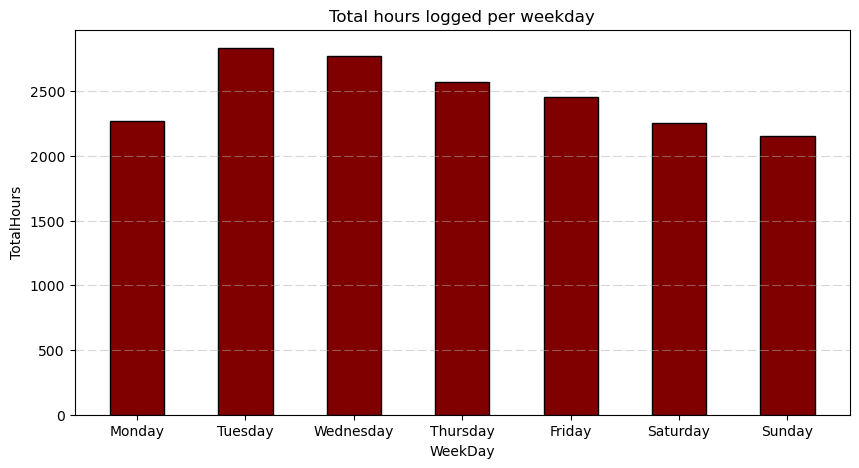

In [119]:
# creating a bar plot of total logged hours per weekday
plt.figure(figsize=(10,5))
plt.bar(weekdays_df.WeekDay, weekdays_df.TotalHours, width=0.5, color='maroon', edgecolor='black')

plt.xlabel("WeekDay")
plt.ylabel("TotalHours")
plt.title("Total hours logged per weekday")
plt.grid(axis='y',dashes=(8,3), alpha=0.5)
plt.show()


Intepreting figure.
1. Users  log most data on Tuesdays and then there is a drop off for the rest of the week
2. Least data is logged on Sundays
3. Users have a slow start to the week as data logged on Mondays is low

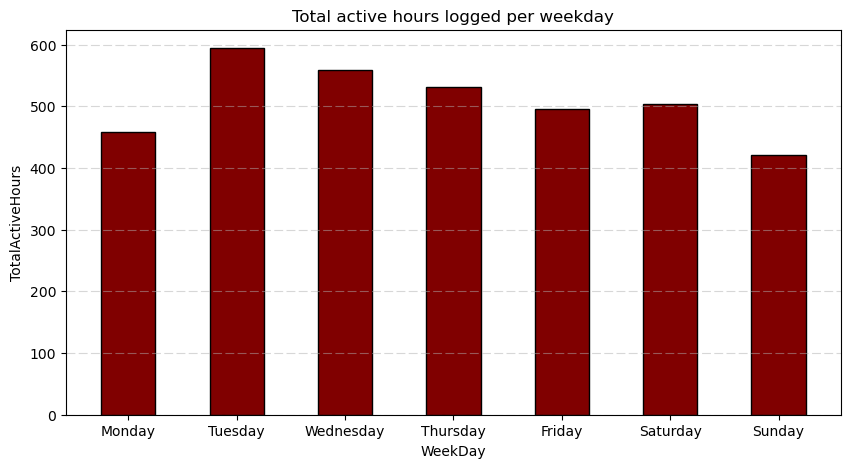

In [120]:
# creating a bar plot of total active logged hours per weekday
plt.figure(figsize=(10,5))
plt.bar(weekdays_df.WeekDay, weekdays_df.TotalActiveHours, width=0.5, color='maroon', edgecolor='black')

plt.xlabel("WeekDay")
plt.ylabel("TotalActiveHours")
plt.title("Total active hours logged per weekday")
plt.grid(axis='y',dashes=(8,3), alpha=0.5)
plt.show()

Intepreting figure.
1. Users are most active on Tuesdays and then there is a drop off for the rest of the week
2. Users are least active on Sundays
3. Users have a slow start to the week as activity is low during Mondays

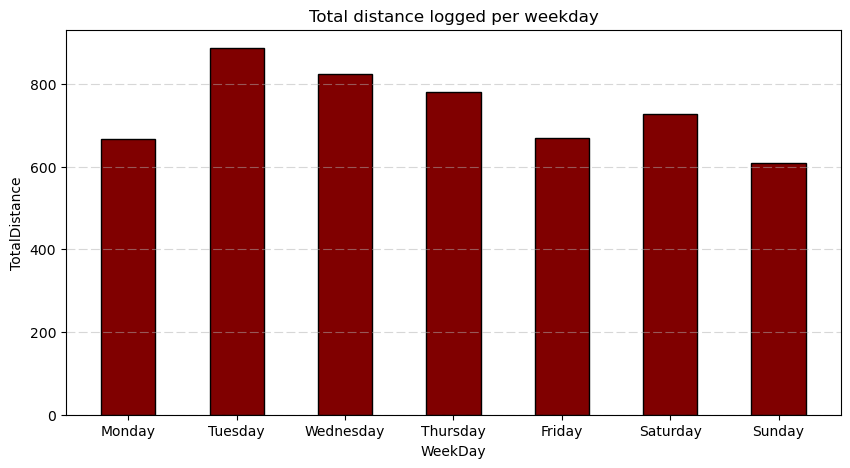

In [121]:
# creating a bar plot of total distance logged per weekday
plt.figure(figsize=(10,5))
plt.bar(weekdays_df.WeekDay, weekdays_df.TotalDistance, width=0.5, color='maroon', edgecolor='black')

plt.xlabel("WeekDay")
plt.ylabel("TotalDistance")
plt.title("Total distance logged per weekday")
plt.grid(axis='y',dashes=(8,3), alpha=0.5)
plt.show()

Intepreting figure.
1. Same trends are present here as in the previous figure

In [122]:
# summing up columns for pie chart
veryActiveMins = df.VeryActiveMinutes.sum()
fairlyActiveMins = df.FairlyActiveMinutes.sum()
lightlyActiveMins = df.LightlyActiveMinutes.sum()
sedentaryMins = df.SedentaryMinutes.sum()

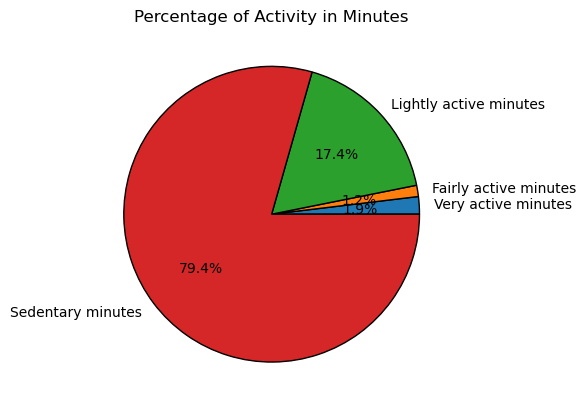

In [123]:
# creating a pie chart for activity types
slices = [veryActiveMins,fairlyActiveMins,lightlyActiveMins,sedentaryMins]
labels = ["Very active minutes", "Fairly active minutes", "Lightly active minutes", "Sedentary minutes"]

plt.pie(slices, labels = labels, wedgeprops = {"edgecolor": "black"}, autopct = "%1.1f%%")
plt.title("Percentage of Activity in Minutes")
plt.show()

Intepreting figure.
1. Sedentary activity is the most common type
2. Ignoring sedentary activity light activity is the most common type

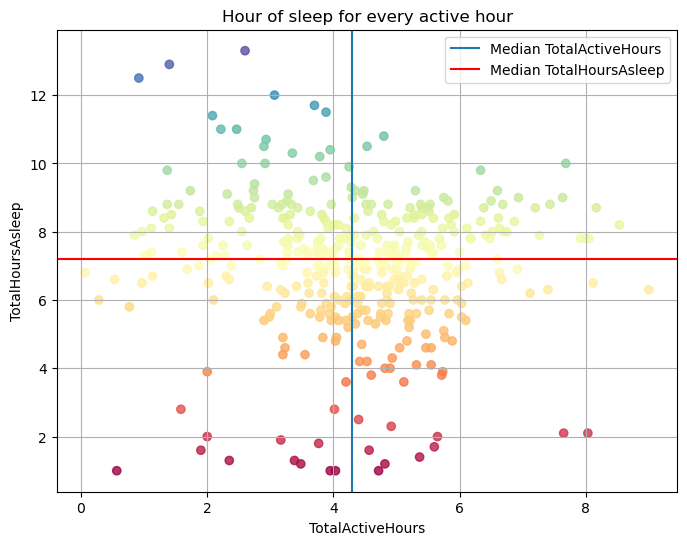

In [124]:
# creating a scatter plot for hour of sleep for every active hour
plt.figure(figsize=(8,6))
plt.scatter(df['TotalActiveHours'], df['TotalHoursAsleep'], alpha = 0.8, c = df['TotalHoursAsleep'], cmap = "Spectral")

plt.xlabel("TotalActiveHours")
plt.ylabel("TotalHoursAsleep")
plt.title("Hour of sleep for every active hour")

medianActiveHours = df['TotalActiveHours'].median()
medianTotalHoursAsleep = df['TotalHoursAsleep'].median()

plt.axvline(medianActiveHours,label='Median TotalActiveHours')
plt.axhline(medianTotalHoursAsleep, color ='red', label ='Median TotalHoursAsleep')
plt.grid(True)
plt.legend()
plt.show()

Intepreting figure.
1. Median TotalActiveHours is a bit over 4 hours
2. Median time asleep is a bit under 7 hours
3. No correlation between activity and amount of sleep can be discerned from the graph


# Act

Insight and recommendations relating to the business questions

Business questions.
1. What are some trends in smart device usage?
   - Most users are engaging in light activity
   - Users are most active at the start of the week (ignoring Monday)

2. How could these trends apply to Bellabeat customers?
   - Bellabeat offers a similar product to FitBit so one could assume that the same trends apply

3. How could these trends help influence Bellabeat marketing strategy?
   - Bellabeat could encourage people to get a jump on the week by exercising more on Mondays e.g.
   - Bellabeat could encourage people to move by saying that light activity is better than no activity

Suggestions for further analysis
   - Analyze how sleep quality is affected by exercise and incorporate findings into the marketing strategy
